In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [65]:
train = pd.read_csv('titanic_train.csv')

In [66]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

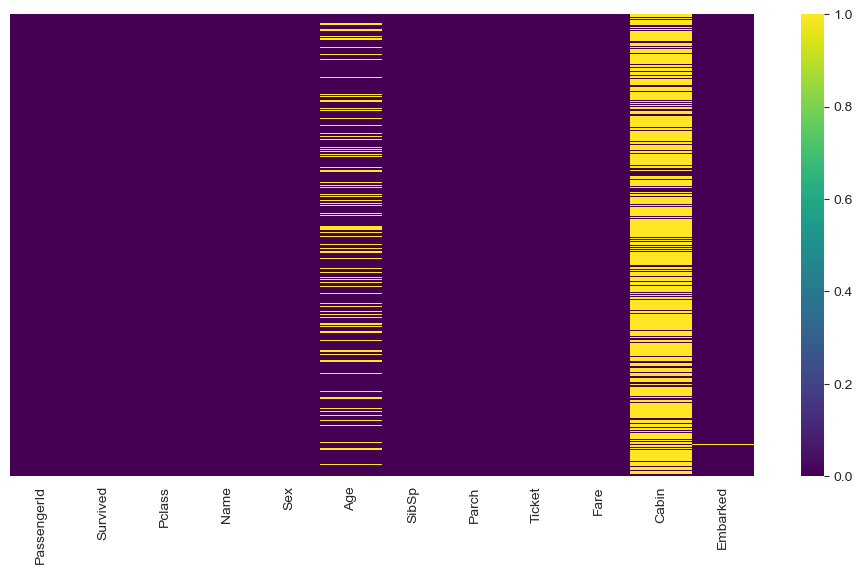

In [69]:
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

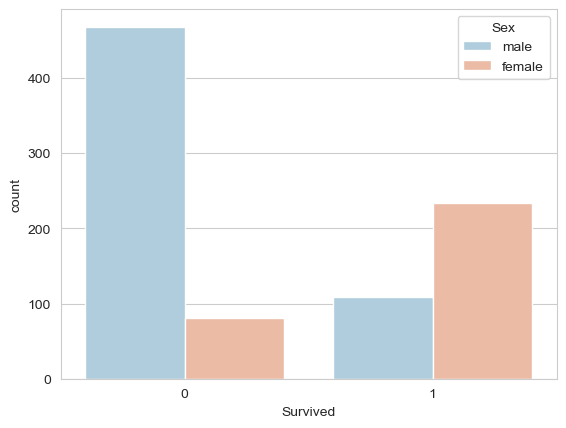

In [70]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

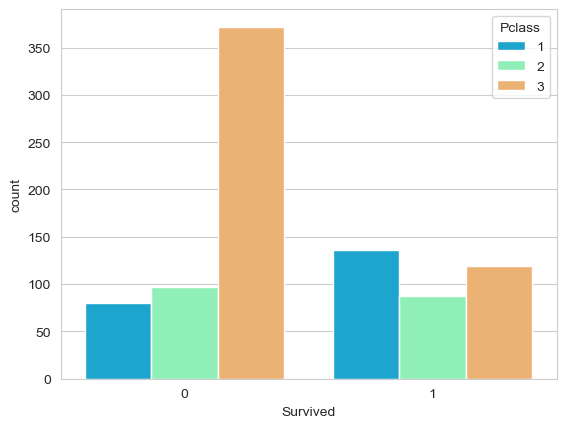

In [71]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

In [72]:
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

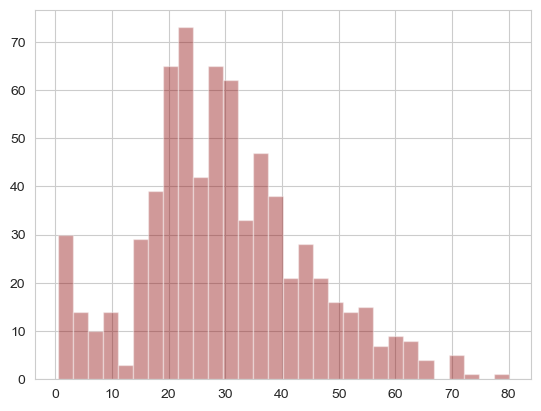

In [73]:
train['Age'].hist(bins=30, color='darkred', alpha=0.4)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

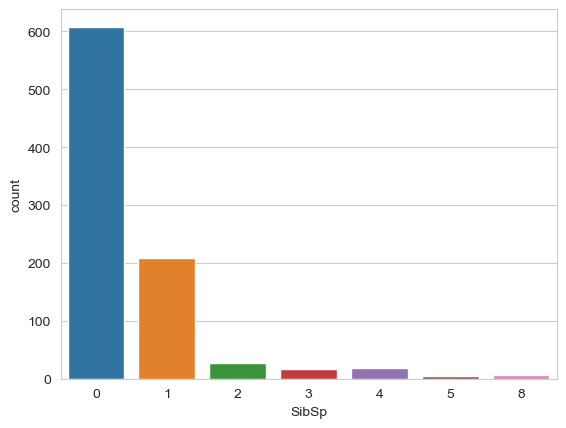

In [74]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot:>

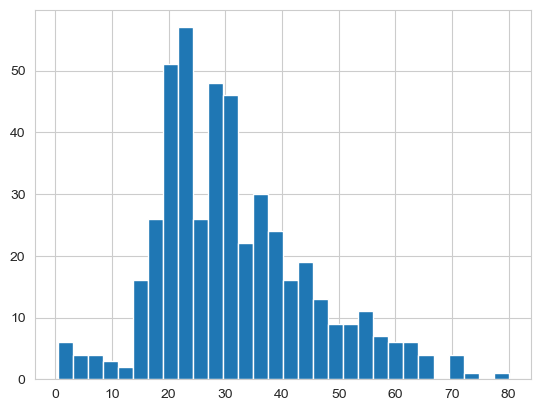

In [75]:
train[train['SibSp']==0]['Age'].hist(bins=30)

<AxesSubplot:>

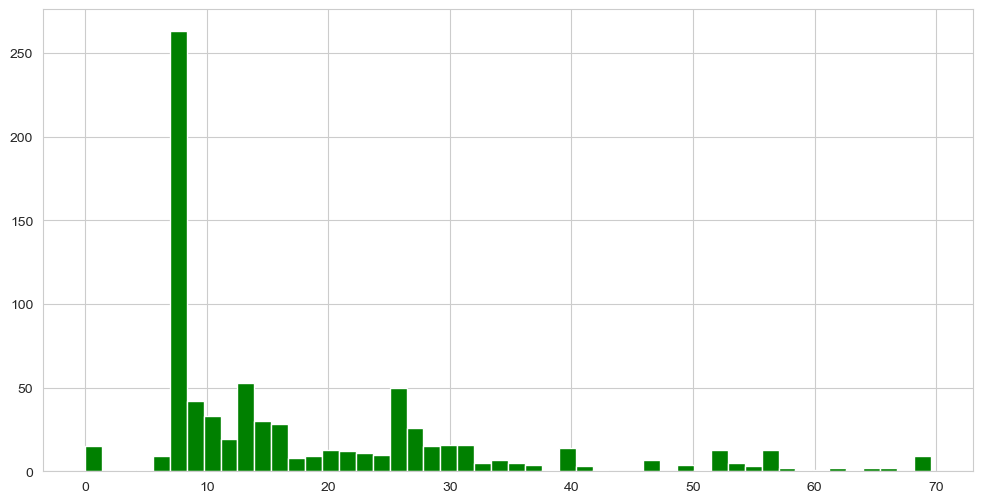

In [76]:
train[train['Fare']<70]['Fare'].hist(color='green', bins=50, figsize=(12, 6))

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

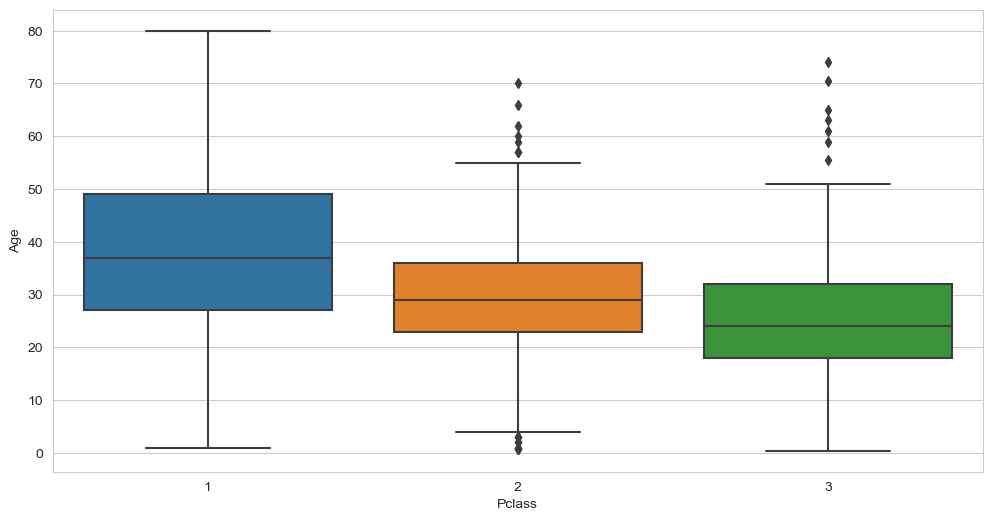

In [77]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=train)

In [78]:
#vamos tratar os dados da figura heatmap realizada lá emcima
#o objetivo é identificar e preencher os dados de idade que estão falando na mesma
def preencher_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:#else para o segundo if e o elif
            return 24
    else:#else para o primeiro if
        return Idade

In [79]:
train['Age'] = train[['Age', 'Pclass']].apply(preencher_idade, axis=1)

In [80]:
#novo dataframe com dados de idade preenchidos
train['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<AxesSubplot:>

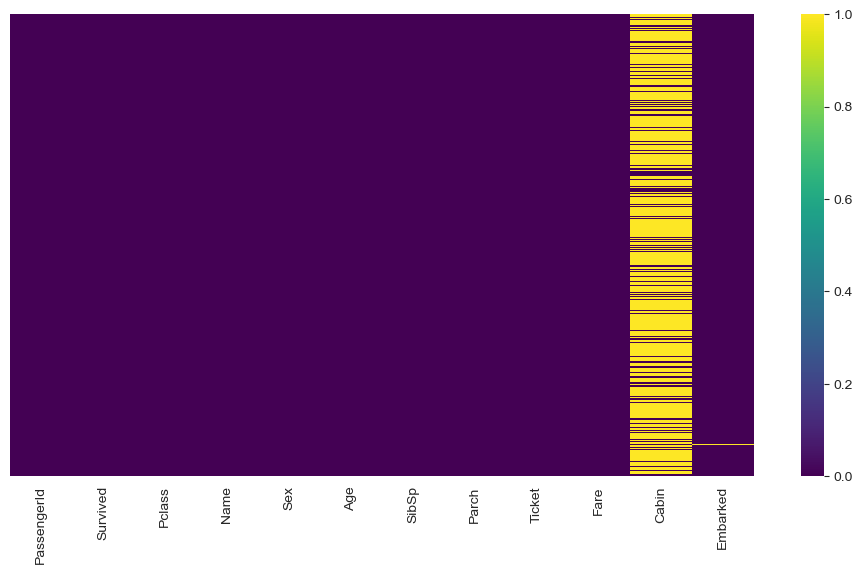

In [81]:
#confirmando se houve preenchimento de todos os dados
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

<AxesSubplot:>

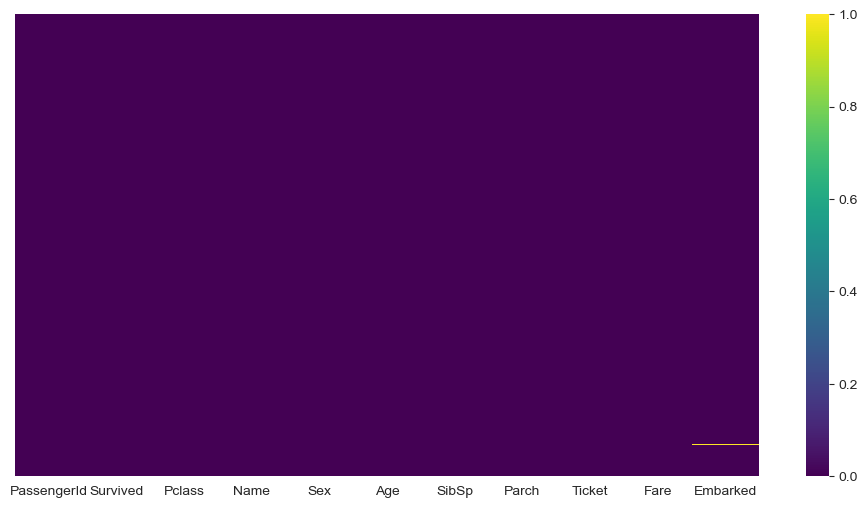

In [82]:
#ainda há muitos valores de pessoas sem idade, como podemos ver as linhas amarelas
#na coluna Cabin
#duas formas para resolver este problema são:
del train['Cabin']
# train.drop['Cabin', inplace=True]
# o novo heatmap ficaria assim
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

<AxesSubplot:>

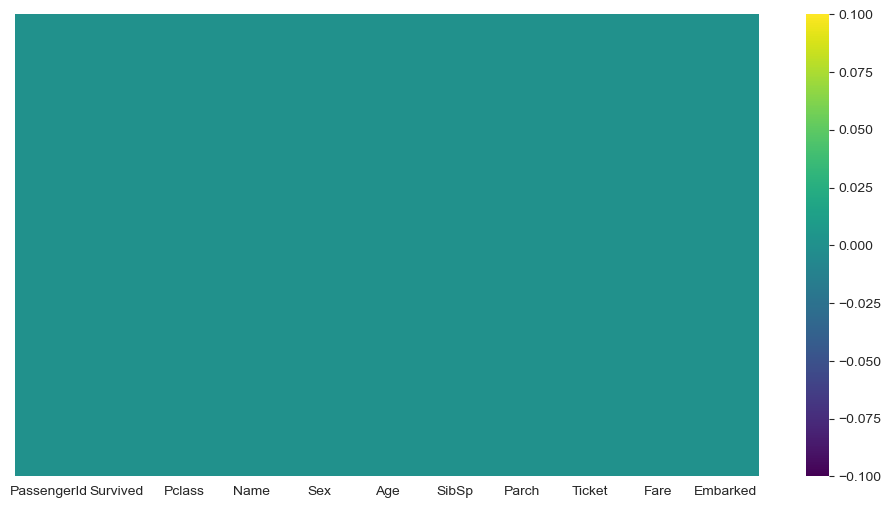

In [83]:
#note que há uma linha amarela na coluna embarked, para remove-la utilizaremos o códigp abaixo
train.dropna(inplace=True)
# o novo heat map ficaria assim
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

In [84]:
#agora temos que converter ou deletar as informações que não influenciarão na morte das pessoas
#removendo as strings de female e male
sex = pd.get_dummies(train['Sex'], drop_first=True) #para atribuir a variação se for female 0 se for male 1
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [85]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [86]:
#agora temos que excluir as variáveis que foram convertidas e as variaveis que não vão afetar na morte dos passageiros
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [87]:
#juntando os dataframes convertidos ao novo dataframe
train = pd.concat([train, sex, embark], axis=1) #para colunas e não linhas)
train

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,0,3,24.0,1,2,23.4500,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [90]:
# realizando a regressão logistíca
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

In [99]:
#só pra garantir usei todos os parâmetros.
logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, solver='liblinear', max_iter=100000, multi_class='ovr', n_jobs=1, penalty='l2', random_state=None, tol=0.0001, verbose=0, warm_start=False)
logmodel.fit(X_train, Y_train)

LogisticRegression(max_iter=100000, multi_class='ovr', n_jobs=1,
                   solver='liblinear')

In [100]:
predictions = logmodel.predict(X_test)

In [101]:
from sklearn.metrics import classification_report

In [103]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.82      0.85      0.84       161
           1       0.76      0.72      0.74       106

    accuracy                           0.80       267
   macro avg       0.79      0.78      0.79       267
weighted avg       0.80      0.80      0.80       267



In [106]:
# explicando os resultados acima
#precision: considerada boa, pois está acima de 0.8, demonstrando que o modelo acerto mais predições para pessoas que morreram do que sobreviveram( 0,82 contra 0,76, respectivamente)
#para o recall teremos que usar uma confusion matrix
from sklearn.metrics import confusion_matrix

In [108]:
print(confusion_matrix(Y_test, predictions))
#para explicar uma confusion matrix, usaremos o conceito abaixo
#Confusion matrix =  [[TP	FN]
#                     [FP	TN]]
#TP= true positive predicions
#FP= false positive predicions
#FN= false negative predicions
#TN= true negative predicions
#o modelo possui valores elevados para acertos verdadeiros (TP= 137) e para valores verdadeiros negativos (TN=76)
# se estes valores fossem mais próximos dos FN, ou FP, teriamos um modelo ruim.


[[137  24]
 [ 30  76]]
